# Practicum Convolution Neural Nets (CNN)

## Imports

In [54]:
# Voeg imports toe als je ze nodig hebt
import torch
import torchvision.io as tio
import matplotlib.pyplot as plt

%matplotlib inline 

## Bronnen

EuroSAT project: https://github.com/phelber/eurosat

Pytorch Neural Nets: https://pytorch.org/docs/stable/nn.html

Kernels: https://en.wikipedia.org/wiki/Kernel_(image_processing)

A simple CNN with Pytorch: https://tomroth.com.au/pytorch-cnn

A guide to convolution arithmetic for deep learning: https://arxiv.org/pdf/1603.07285.pdf

Using Dropout Regularization in PyTorch Models: https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models

if neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

## Context

Dit practicum bestaat uit twee onderdelen: het toepassen van een convolutie en pooling filter, en het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden. Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset.

## Voorbereiding

1.  Download de EuroSAT_RGB dataset.

Zie https://zenodo.org/record/7711810#.ZAm3k-zMKEA voor de beschrijving.


2. Unzip de EuroSAT_RGB.zip in de folder van dit notebook (. path) en bekijk de inhoud.

## Opdrachten

### Opdracht 1: afbeelding inladen

PyTorch Vision maakt het inladen van afbeeldingen gemakkelijk via:

https://pytorch.org/vision/stable/io.html

In [55]:
# a. Localiseer de afbeelding 'Industrial_1.jpg'

## \data\EuroSat\Industrial\Industrial_1.jpg

# b. Wat is het relative pad van 'Industrial_1.jpg'?

## \data\EuroSat\Industrial\

# c. Bekijk de documentatie van de PyTorch io module

## https://pytorch.org/vision/stable/io.html
## read_image(path[, mode])
## Reads a JPEG or PNG image into a 3 dimensional RGB or grayscale Tensor.

# d. Laad de afbeelding 'Industrial_1.jpg' in (variable 'industrial')

In [70]:
path_data = './data/EuroSat/Industrial/'
path_data_forest = './data/EuroSat/Forest/'
industrial = tio.read_image(path_data + 'industrial_1.jpg')
type(industrial)

torch.Tensor

In [57]:
industrial.shape

torch.Size([3, 64, 64])

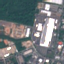

In [58]:
# plt.imshow(industrial, interpolation='nearest')
# plt.show
# doesnt work cuz 3,64,64 not 64,64,3
import torchvision.transforms.functional as F
img = F.to_pil_image(industrial)

display(img) # img.show() opens up a window instead of inline

### Opdracht 2: convolutie + padding uitvoeren

De basis-ingrediënten van een CNN, convolutie en pooling, hebben we al met de hand uitgevoerd.

Ditmaal voeren we een convolutie filter uit met PyTorch Functional:

https://pytorch.org/docs/stable/nn.functional.html

In [59]:
# a. Bekijk het voorbeeld helemaal onderaan de documentatie over conv2d
        # With square kernels and equal stride
        # filters = torch.randn(8, 4, 3, 3)
        # inputs = torch.randn(1, 4, 5, 5)
        # F.conv2d(inputs, filters, padding=1)

In [60]:
# b. Welke dimensie heeft de tensor 'industrial'?
industrial.shape

torch.Size([3, 64, 64])

In [61]:
industrial[0][:].shape

torch.Size([64, 64])

In [62]:
# c. Maak een 3 x 3 kernel om een edge te detecteren:

    #    - Voor kernels zie bronnen
    #    - Representeer de kernel als een tensor met naam 'edge_filter'

edge_filter = torch.Tensor([
            [ 1,  1,  1], 
            [ 0,  0, 0 ], 
            [-1, -1, -1]
])
edge_filter
type(edge_filter)

torch.Tensor

In [65]:

# d. Ontwerp een conv2d filter:

#    - Geef 'edge_filter' mee
#    - De default stride is 1 (geeft aan hoeveel de kernel verplaatst per stap)
#    - De default padding is 0 (geeft aan hoe we omgaan met de randen)


## option to use scipy convolve2d or the numpy only method deviced in the previous assignment
import numpy as np

def conv_single_step(X_slice, k):
  return np.sum(X_slice * k)

def conv2dfilter(image, kernel): 
        height, width = image.shape
        f, f = kernel.shape
        H = int((height-f)+1)
        W = int((width-f)+1)
        Z = np.zeros((H,W))

        for h in range(H):
            vert_start = h
            vert_end = f+h
            for w in range(W): 
                horiz_start = w
                horiz_end = f+w
                a_slice_prev = image[vert_start:vert_end , horiz_start:horiz_end]  
                Z[h, w] = conv_single_step(a_slice_prev, kernel) 
        
        return Z


In [67]:
# e. Pas je ontworpen filter toe op 'Industrial_1.jpg'
# f. Toon het resultaat
industrialconv1 = conv2dfilter(industrial[0][:].numpy(), edge_filter.numpy()) #had to convert to numpy to work

<function matplotlib.pyplot.show(close=None, block=None)>

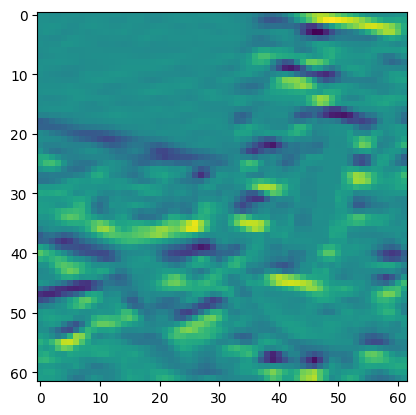

In [69]:
plt.imshow(industrialconv1, interpolation='nearest')
plt.show

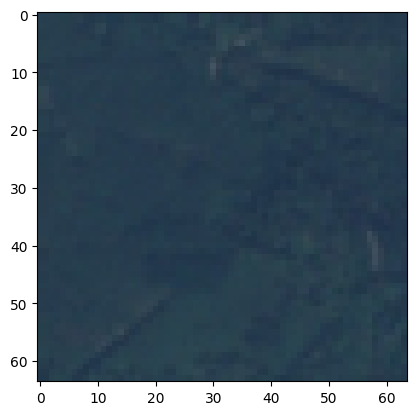

In [84]:
# g. Herhaal bovenstaande stappen maar dan voor 'Forrest_1.jpg' <-- forest with 1 r

forest = tio.read_image(path_data_forest + 'Forest_1.jpg')
plt.imshow(forest.permute(1,2,0)) #re-arrange so channels at postion 0 are put lat

<function matplotlib.pyplot.show(close=None, block=None)>

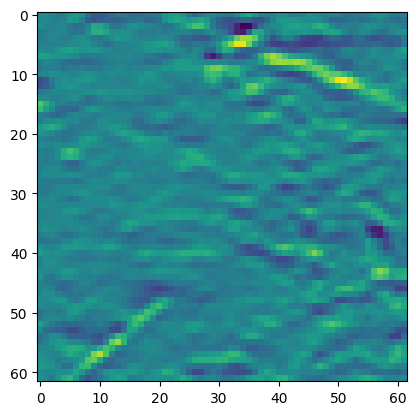

In [77]:

forestconv2d = conv2dfilter(forest[0][:].numpy(), edge_filter.numpy()) #had to convert to numpy to work
plt.imshow(forestconv2d, interpolation='nearest')
plt.show

### Reflectie

Zijn 'Industrial_1.jpg' en 'Forrest_1.jpg' na een convolutie beter te onderscheiden?

In [ ]:
# Extra: varieer de stride en de padding en toon de resultaten

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [ ]:
# a. Bekijk de pooling opties en kies de juiste avg-variant

## https://pytorch.org/docs/stable/nn.functional.html#pooling-functions
## https://pytorch.org/docs/stable/generated/torch.nn.functional.avg_pool2d.html#torch.nn.functional.avg_pool2d

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':

    #    - Kies een 3x3 kernel en een stride van 1

In [ ]:
torch.nn.functional

In [ ]:
# c. Herhaal de bovenstaande stappen voor voor 'Forrest_1.jpg'

### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

In [ ]:
# Extra: varieer de stride en de kernel

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

In [ ]:
# a. Bedenk en maak zelf een 2d convolution filter

# b. Bedenk en maak zelf een 2d pooling filter

# c. Pas nu de convolutie toe op 'Industrial_1.jpg'

# d. Pas vervolgens een pooling toe op de uitkomst van c.

# e. Doe hetzelfde voor de afbeelding 'Forrest_1.jpg'

### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

In [ ]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [ ]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels?
#    - Hoe representeerden we de kruisjes en de rondjes?
#    - Hoe combineerden we dit tot een dataset?

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?

# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [ ]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2)
        
    #-------------------------------------------------------
        
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        x = x.view(-1, 16 * 5 * 5)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x)

#-------------------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [ ]:
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?